# Linear Regression Machine Learning Project: Ecommerce Clients

In this project we work with a dataset [available on Kaggle](https://www.kaggle.com/iyadavvaibhav/ecommerce-customer-device-usage/notebooks). The data includes information about customers of an e-commerce website, including the following:
- Avg. Session Length: Average session of in-store style advice sessions.
- Time on App: Average time spent on App in minutes
- Time on Website: Average time spent on Website in minutes
- Length of Membership: How many years the customer has been a member.

In this project, we suppose that the company is trying to decide whether to focus their efforts on their mobile app experience or their website. We are here to help them make a data-driven decision.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Getting the Data


**Note:** As mentioned before, the data comes from a test dataset freely [available on Kaggle](https://www.kaggle.com/iyadavvaibhav/ecommerce-customer-device-usage/notebooks). Note that this is a training set and the information does not correspond to real people.

In [78]:
customers = pd.read_csv('Ecommerce Customers')

In [79]:
customers.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [18]:
customers.tail()

Email  \
495  lewisjessica@craig-evans.com   
496           katrina56@gmail.com   
497            dale88@hotmail.com   
498           cwilson@hotmail.com   
499     hannahwilson@davidson.com   

                                               Address         Avatar  \
495  4483 Jones Motorway Suite 872\nLake Jamiefurt,...            Tan   
496  172 Owen Divide Suite 497\nWest Richard, CA 19320  PaleVioletRed   
497  0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...       Cornsilk   
498  680 Jennifer Lodge Apt. 808\nBrendachester, TX...           Teal   
499  49791 Rachel Heights Apt. 898\nEast Drewboroug...    DarkMagenta   

     Avg. Session Length  Time on App  Time on Website  Length of Membership  \
495            33.237660    13.566160        36.417985              3.746573   
496            34.702529    11.695736        37.190268              3.576526   
497            32.646777    11.499409        38.332576              4.958264   
498            33.322501    12.391423        36.840086              2.336485   
499            33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  
495           573.847438  
496           529.049004  
497           551.620145  
498           456.469510  
499           497.778642

In [19]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [20]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [21]:
customers.duplicated().sum()

0

In [22]:
customers.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

## Exploratory Data Analysis

First we ask the following question: How are the client's time spent on each platform related to the amount that they spend per year? There doesn't seem to be much correlation between the time on the desktop website with the amount that clients spend per year. On the other side, the second graph shows that there seems to be a small correlation between the time spent on the app and the yearly spending. This is probably because these clients tend to spend less time browsing on the phone. Maybe the payment process is faster on the app or the calls-to-action are more successful there.

After analysing the pairplot, we see that there does seem to be one big positive correlation between two variables: the length of membership and the yearly expenditure. In the end we recrate this plot to visualise the regression line.

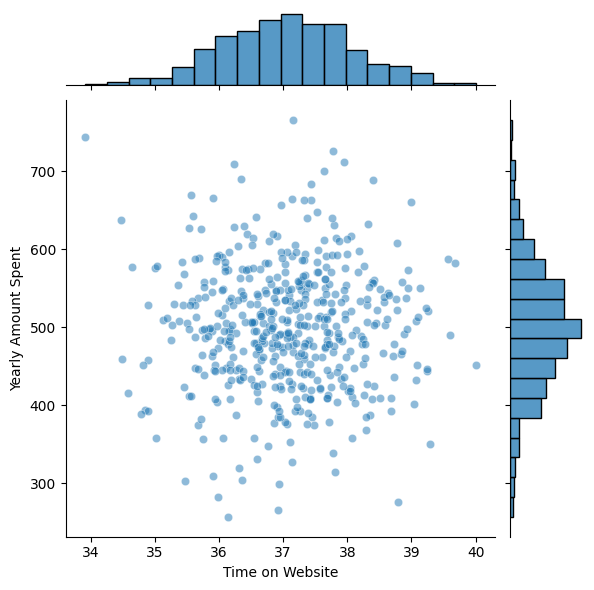

In [23]:
# time on website vs yearly amount spent
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, alpha=0.5)

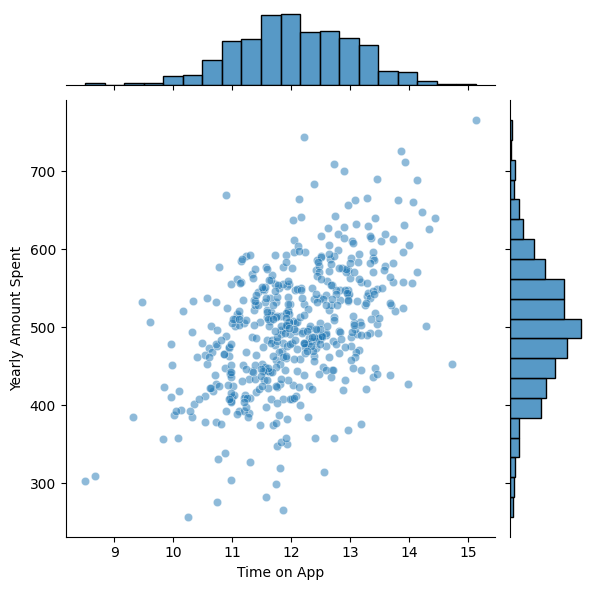

In [24]:
# time on app vs yearly amount spent
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers, alpha=0.5)

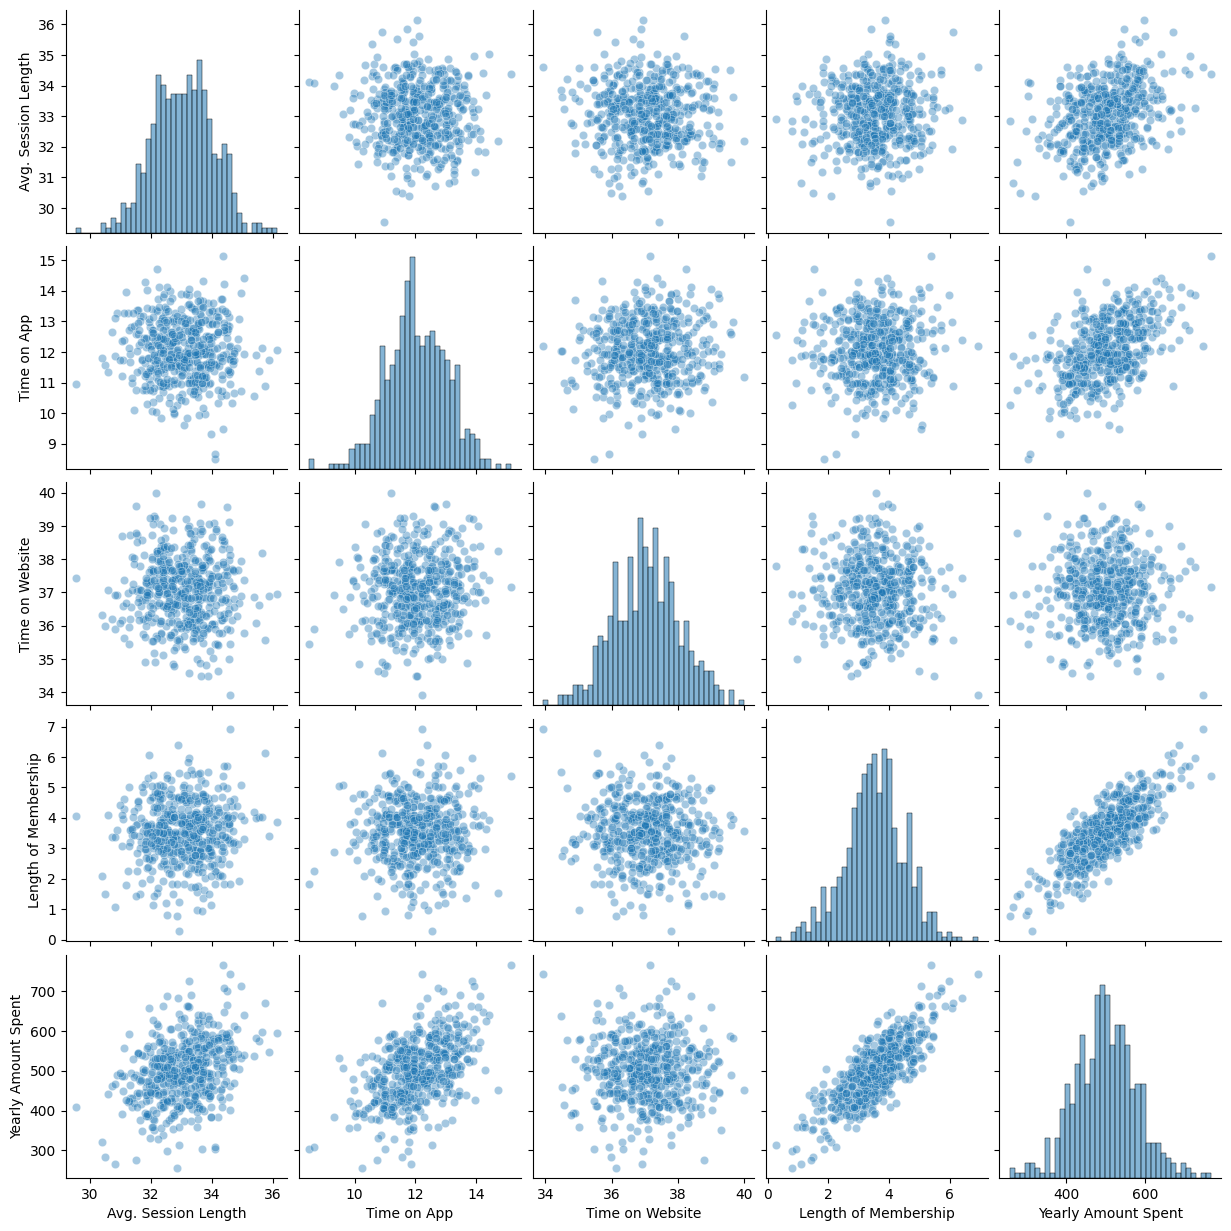

In [25]:
sns.pairplot(customers,
             plot_kws={'alpha':0.4}, 
             diag_kws={'alpha':0.55, 'bins':40},
             kind='scatter')

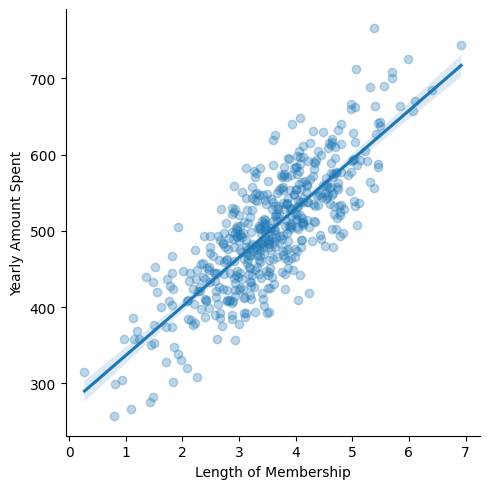

In [26]:
# length of membership vs yearly amount spent
sns.lmplot(x='Length of Membership', 
           y='Yearly Amount Spent', 
           data=customers,
           scatter_kws={'alpha':0.3})

In [80]:
from ydata_profiling import ProfileReport 
profile = ProfileReport (customers)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Splitting the data

X are the predictores, and y is the output. What we want to do is create a model that will take in the values in the X variable and predict y with a linear regression algorithm. We will use the SciKit Learn library to create the model.

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [30]:
X.head()
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

## Training the Model with multivariable regression using Scikit Learn

In this section, we create the model and feed the training data to it. This model will tell us which input has the biggest impact in the output (yearly expenditure). As the plots suggested, we find that the most important coefficient is that of the "Length of Membership" predictor, followed by the 'Time on App' and the 'Avg. Session Length'. The time on website does not seem to be an important factor to the amount a customer spends per year.

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
# r squared
lm.score(X_test, y_test)

0.9808757641125855

In [62]:
lm.score(X_train, y_train)

0.9854085989105928

In [35]:
# the coefficients
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [76]:
lm.intercept_

-1050.6536746645725

In [37]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


## Predicting Test Data
Now that the model is trained, we should be able to use it to make our predictions and evaluate our model. The scatter plot below plots the actual y values to the model's predictions. The model seems to behave accurately.

In [72]:
predictions= lm.predict(X_test)
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

In [48]:
y_test

361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
266    554.003093
23     519.340989
222    502.409785
261    514.009818
426    530.766719
Name: Yearly Amount Spent, Length: 150, dtype: float64

Text(0.5, 1.0, 'Yearly Amount Spent vs. Model Predictions')

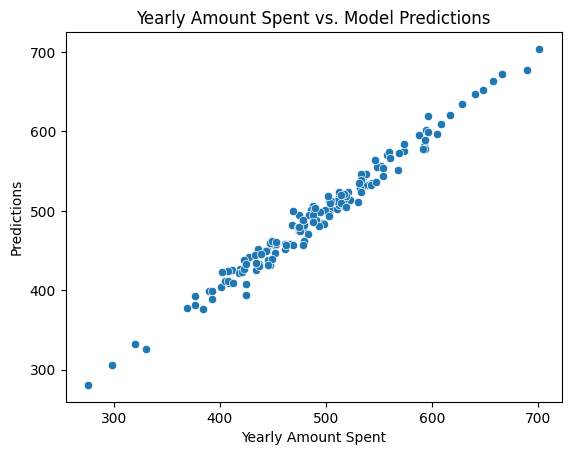

In [73]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x=y_test,y=prediction)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

In [56]:
prediction= lm.predict([[33.0, 12.0, 39.0, 5]])
prediction

array([587.69283517])

## Evaluation of the model

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [41]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.426091641432116
Mean Squared Error: 103.91554136503333
Root Mean Squared Error: 10.193897260863155


## Residuals
Distribution plot of the residuals of the model's predictions. They should be normally distributed.

<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

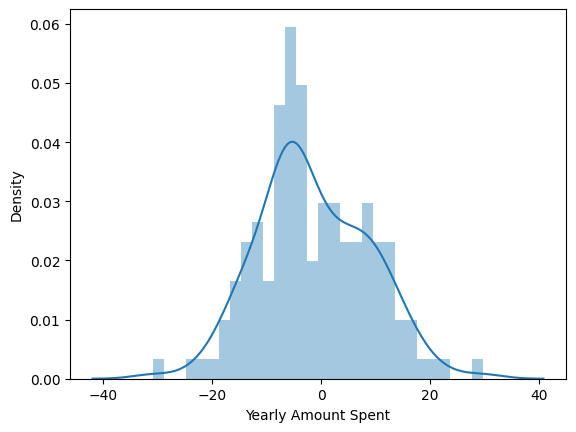

In [42]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

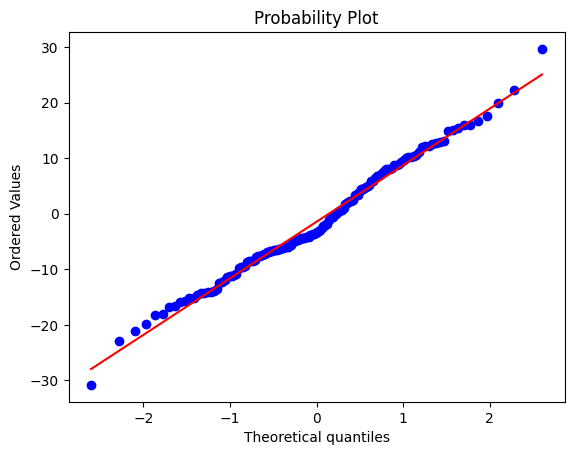

In [43]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

## Conclusion

It can be tricky to interpret the information in this analysis. According to the model, the most significant factor for clients is not the time spent on the app or website, but their length of membership. However, of the two predictors (desktop vs app), the app has the strongest influence by far. In fact, the time spent on the desktop website does not seem to have any correlation at all! In other words, according to the data, the amount of time that the customer spends on the desktop website has almost nothing to do with the amount of money they will spend. 

We could interpret this in two different ways. Firstly, this could mean that the desktop website needs more work to make its visitors buy more. Secondly, it could mean that people tend to be more influenced by mobile applications of online stores than by desktop websites. So maybe efforts should be directed towards taking advantage of this fact. Indeed, the interpretation of this information requires expertise in the online marketing sphere. Our analysis and our model, however, does a very good job in weighting the predictors importance.